# Importing Necessary Libraries

In [283]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import kaleido
import missingno as mno
pio.renderers.default = "vscode"

In [284]:
lifeExp = pd.read_csv('/Users/ice50l/Downloads/life_expectancy.csv')
lifeExp.head()

,Country,Year,Status,Population,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling,Life expectancy
0,Afghanistan,2015,Developing,33736494.0,65.0,1154,6.0,65.0,0.1,62,83,8.16,584.259210,19.1,17.2,0.01,10.1,65.0
1,Afghanistan,2014,Developing,327582.0,62.0,492,58.0,62.0,0.1,64,86,8.18,612.696514,18.6,17.5,0.01,10.0,59.9
2,Afghanistan,2013,Developing,31731688.0,64.0,430,62.0,64.0,0.1,66,89,8.13,631.744976,18.1,17.7,0.01,9.9,59.9
3,Afghanistan,2012,Developing,3696958.0,67.0,2787,67.0,67.0,0.1,69,93,8.52,669.959000,17.6,17.9,0.01,9.8,59.5
4,Afghanistan,2011,Developing,2978599.0,68.0,3013,68.0,68.0,0.1,71,97,7.87,63.537231,17.2,18.2,0.01,9.5,59.2


# Cleaning Data

In [285]:
lifeExp.shape

(2848, 18)

In [286]:
print("Number of duplicate data : ",lifeExp.duplicated().sum())

Number of duplicate data :  0


In [287]:
lifeExp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               2848 non-null   object 
 1   Year                  2848 non-null   int64  
 2   Status                2848 non-null   object 
 3   Population            2204 non-null   float64
 4   Hepatitis B           2306 non-null   float64
 5   Measles               2848 non-null   int64  
 6   Polio                 2829 non-null   float64
 7   Diphtheria            2829 non-null   float64
 8   HIV/AIDS              2848 non-null   float64
 9   infant deaths         2848 non-null   int64  
 10  under-five deaths     2848 non-null   int64  
 11  Total expenditure     2627 non-null   float64
 12  GDP                   2406 non-null   float64
 13  BMI                   2816 non-null   float64
 14  thinness  1-19 years  2816 non-null   float64
 15  Alcohol              

In [288]:
lifeExp.describe()

,Year,Population,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling,Life expectancy
count,2848.000000,2.204000e+03,2306.000000,2848.000000,2829.000000,2829.000000,2848.000000,2848.000000,2848.000000,2627.000000,2406.000000,2816.000000,2816.000000,2660.000000,2688.000000,2848.000000
mean,2007.500000,1.283457e+07,81.076756,2083.082163,82.682220,82.451396,1.756461,28.359902,39.500000,5.935577,7664.398813,38.503374,4.847230,4.638932,12.060156,69.347402
std,4.610582,6.196094e+07,25.019068,10249.107207,23.434954,23.693936,5.148935,117.188032,159.800866,2.504439,14466.241793,19.955485,4.443695,4.064721,3.320160,9.528332
min,2000.000000,3.400000e+01,1.000000,0.000000,3.000000,2.000000,0.100000,0.000000,0.000000,0.370000,1.681350,1.000000,0.100000,0.010000,0.000000,36.300000
25%,2003.750000,1.967585e+05,77.000000,0.000000,78.000000,78.000000,0.100000,0.000000,0.000000,4.240000,477.541713,19.500000,1.600000,0.930000,10.200000,63.500000
50%,2007.500000,1.391756e+06,92.000000,16.000000,93.000000,93.000000,0.100000,3.000000,4.000000,5.760000,1841.086830,43.900000,3.300000,3.785000,12.400000,72.200000
75%,2011.250000,7.438947e+06,97.000000,336.750000,97.000000,97.000000,0.700000,20.000000,25.000000,7.530000,6265.658907,56.200000,7.125000,7.810000,14.300000,75.800000
max,2015.000000,1.293859e+09,99.000000,212183.000000,99.000000,99.000000,50.600000,1800.000000,2500.000000,17.600000,119172.741800,77.600000,27.700000,17.870000,20.700000,89.000000


In [289]:
lifeExp.isna().sum()

Country                   0
Year                      0
Status                    0
Population              644
Hepatitis B             542
Measles                   0
Polio                    19
Diphtheria               19
HIV/AIDS                  0
infant deaths             0
under-five deaths         0
Total expenditure       221
GDP                     442
BMI                      32
thinness  1-19 years     32
Alcohol                 188
Schooling               160
Life expectancy           0
dtype: int64

In [290]:
lifeExp.dtypes

Country                  object
Year                      int64
Status                   object
Population              float64
Hepatitis B             float64
Measles                   int64
Polio                   float64
Diphtheria              float64
HIV/AIDS                float64
infant deaths             int64
under-five deaths         int64
Total expenditure       float64
GDP                     float64
BMI                     float64
thinness  1-19 years    float64
Alcohol                 float64
Schooling               float64
Life expectancy         float64
dtype: object

In [291]:
life = lifeExp.copy()
life.head()

,Country,Year,Status,Population,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling,Life expectancy
0,Afghanistan,2015,Developing,33736494.0,65.0,1154,6.0,65.0,0.1,62,83,8.16,584.259210,19.1,17.2,0.01,10.1,65.0
1,Afghanistan,2014,Developing,327582.0,62.0,492,58.0,62.0,0.1,64,86,8.18,612.696514,18.6,17.5,0.01,10.0,59.9
2,Afghanistan,2013,Developing,31731688.0,64.0,430,62.0,64.0,0.1,66,89,8.13,631.744976,18.1,17.7,0.01,9.9,59.9
3,Afghanistan,2012,Developing,3696958.0,67.0,2787,67.0,67.0,0.1,69,93,8.52,669.959000,17.6,17.9,0.01,9.8,59.5
4,Afghanistan,2011,Developing,2978599.0,68.0,3013,68.0,68.0,0.1,71,97,7.87,63.537231,17.2,18.2,0.01,9.5,59.2


<Axes: xlabel='Polio', ylabel='Count'>

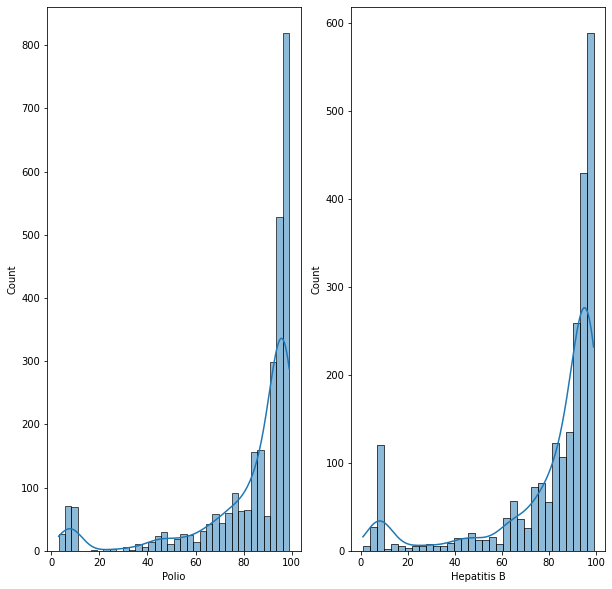

In [292]:
# Checking the distribution of variables
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
sns.histplot(data = life, x = 'Hepatitis B', kde = True)
sns.histplot(data = life, x = 'Polio', kde = True, ax = ax1)

<Axes: >

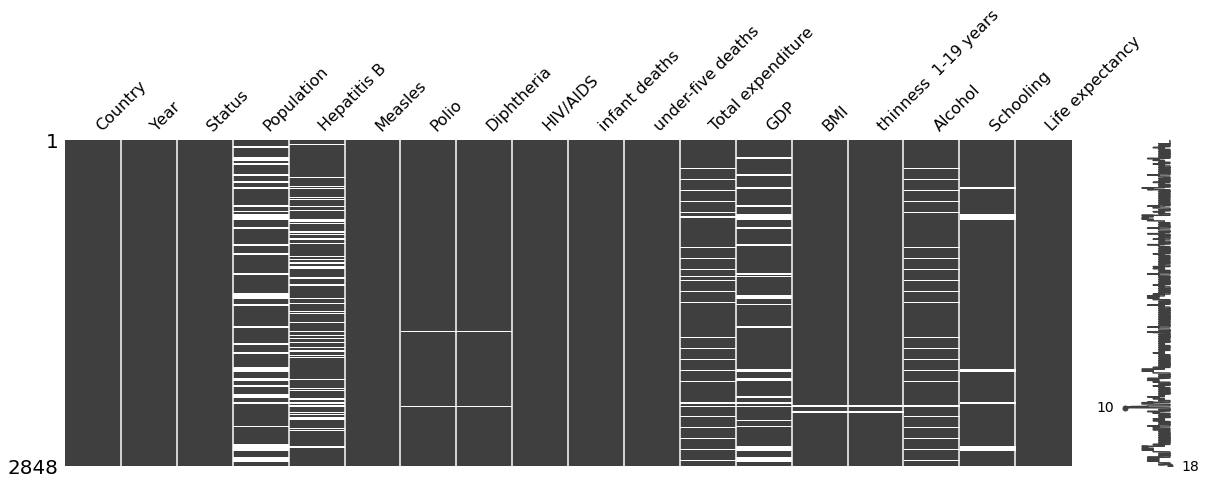

In [293]:
# Checking for missing values
mno.matrix(life, figsize = (20, 6))

# Exploratory Data Analysis

In [294]:
life.head()

,Country,Year,Status,Population,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling,Life expectancy
0,Afghanistan,2015,Developing,33736494.0,65.0,1154,6.0,65.0,0.1,62,83,8.16,584.259210,19.1,17.2,0.01,10.1,65.0
1,Afghanistan,2014,Developing,327582.0,62.0,492,58.0,62.0,0.1,64,86,8.18,612.696514,18.6,17.5,0.01,10.0,59.9
2,Afghanistan,2013,Developing,31731688.0,64.0,430,62.0,64.0,0.1,66,89,8.13,631.744976,18.1,17.7,0.01,9.9,59.9
3,Afghanistan,2012,Developing,3696958.0,67.0,2787,67.0,67.0,0.1,69,93,8.52,669.959000,17.6,17.9,0.01,9.8,59.5
4,Afghanistan,2011,Developing,2978599.0,68.0,3013,68.0,68.0,0.1,71,97,7.87,63.537231,17.2,18.2,0.01,9.5,59.2


In [295]:
meanAids = life.groupby('Country')['HIV/AIDS'].agg('mean')
Aids10 = meanAids.sort_values(ascending = False).head(10)
Aids10 = pd.DataFrame(Aids10).reset_index()
Aids10 = Aids10.rename(columns = {"HIV/AIDS" : "Mean_HIV/Aids"})
Aids10

,Country,Mean_HIV/Aids
0,Swaziland,32.94375
1,Zimbabwe,23.26250
2,Lesotho,22.96875
3,South Africa,18.49375
4,Malawi,16.68125
5,Botswana,16.52500
6,Namibia,13.64375
7,Zambia,11.93125
8,Mozambique,11.38750
9,Central African Republic,8.98125


Text(0.5, 1.0, 'Top 10 Countries with Highest Mean HIV/Aids Cases')

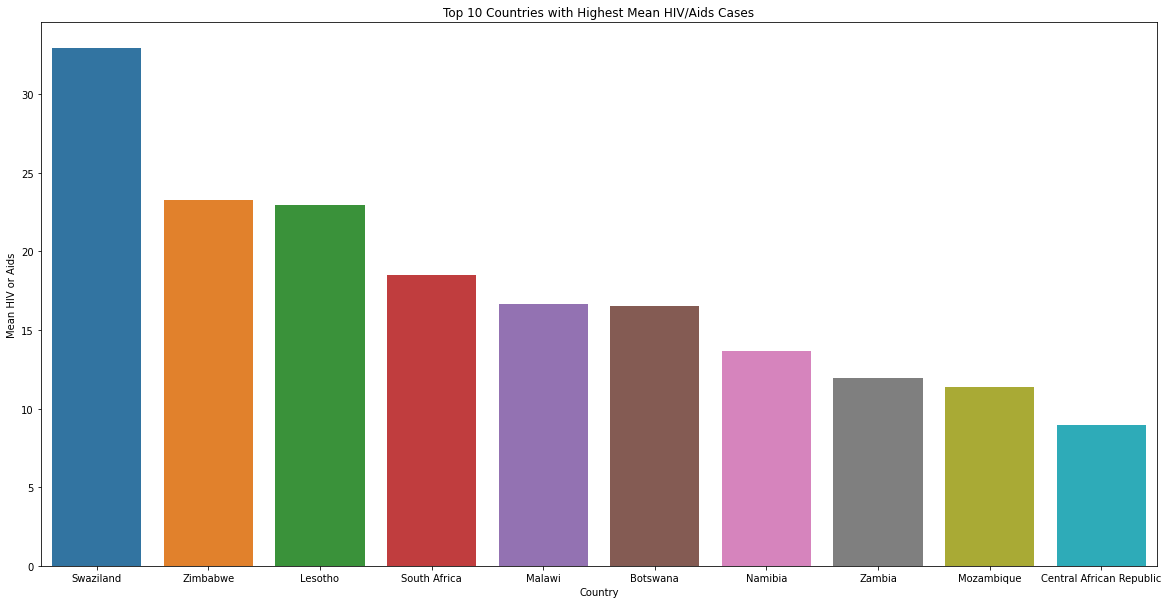

In [296]:
plt.figure(figsize = (20,10))
sns.barplot(data = Aids10, x = 'Country', y = 'Mean_HIV/Aids')
plt.ylabel('Mean HIV or Aids')
plt.title('Top 10 Countries with Highest Mean HIV/Aids Cases')

<Axes: xlabel='Country', ylabel='HIV/AIDS'>

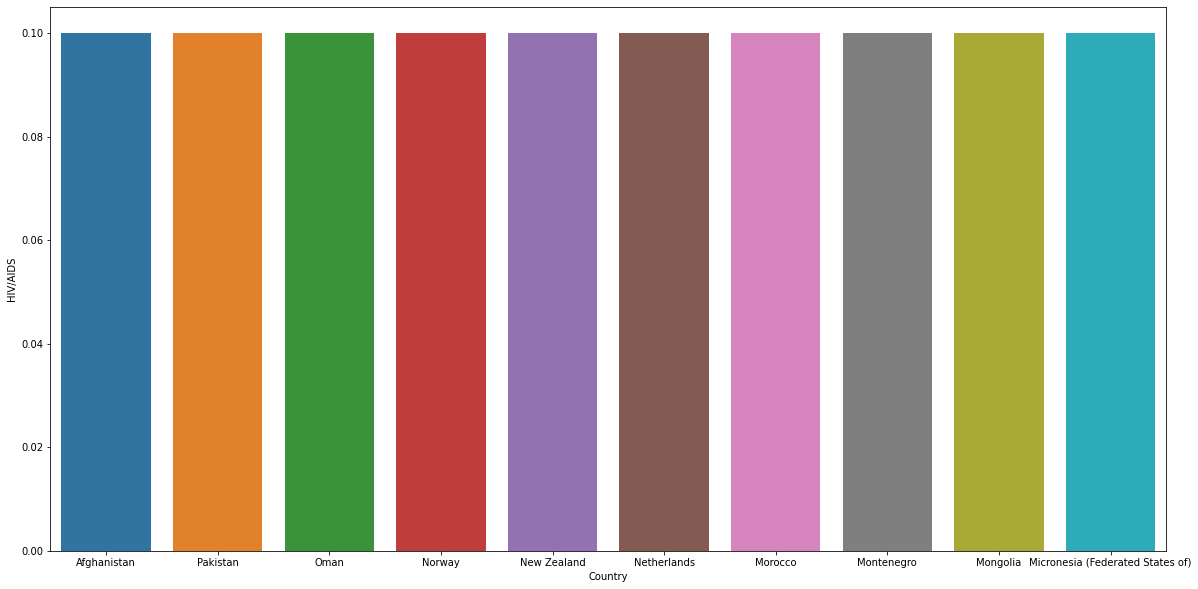

In [297]:
plt.figure(figsize = (20,10))
Bottom_10_countries = meanAids.sort_values(ascending=True).reset_index().head(10)
Bottom_10_countries
sns.barplot(data = Bottom_10_countries, x = 'Country', y = 'HIV/AIDS')

In [298]:
# Check Bottom 10 countries schooling rates
school = life.groupby('Country')['Schooling'].agg('mean')
Bottom_10_countries1 = school.sort_values(ascending = True).reset_index().head(10)
Bottom_10_countries1

,Country,Schooling
0,South Sudan,1.53125
1,Niger,4.01875
2,Djibouti,4.75000
3,Eritrea,4.92500
4,Burkina Faso,5.40625
5,Chad,6.08750
6,Central African Republic,6.23750
7,Sudan,6.37500
8,Mali,6.43125
9,Pakistan,6.71875


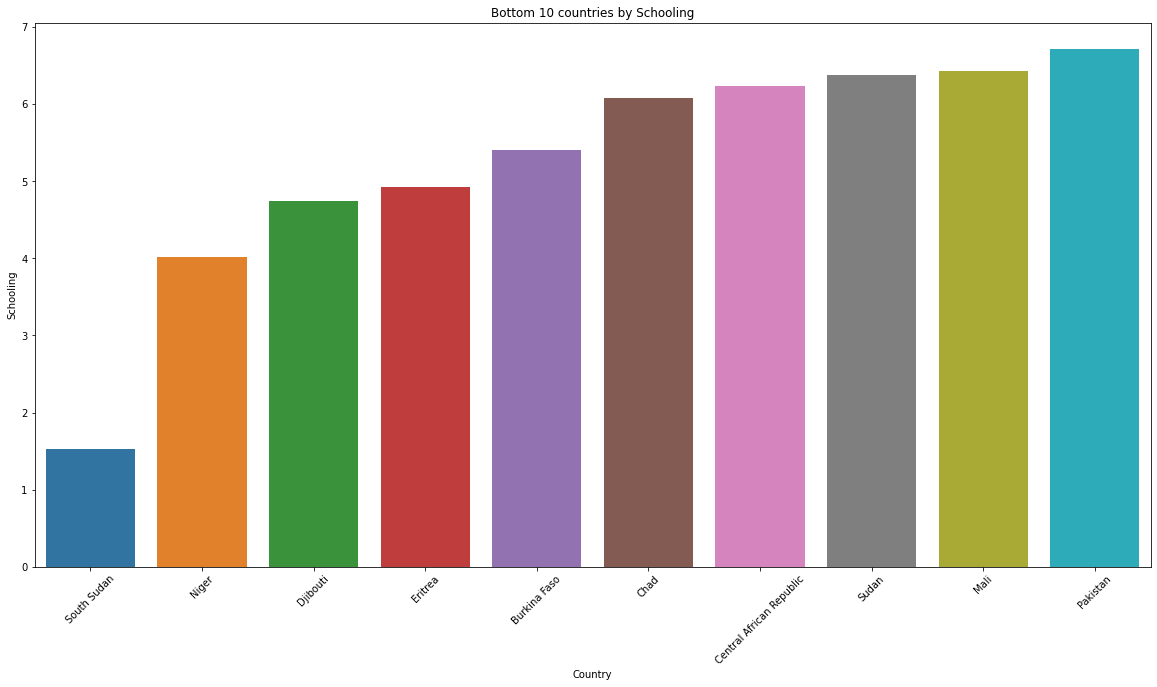

In [299]:
# Plotting bottom 10 countries schooling rates
plt.figure(figsize=(20,10))
sns.barplot(data = Bottom_10_countries1, x = 'Country',  y = 'Schooling')
plt.xlabel('Country')
plt.ylabel('Schooling')
plt.xticks(rotation=45)
plt.title('Bottom 10 countries by Schooling')
plt.show()

<BarContainer object of 10 artists>

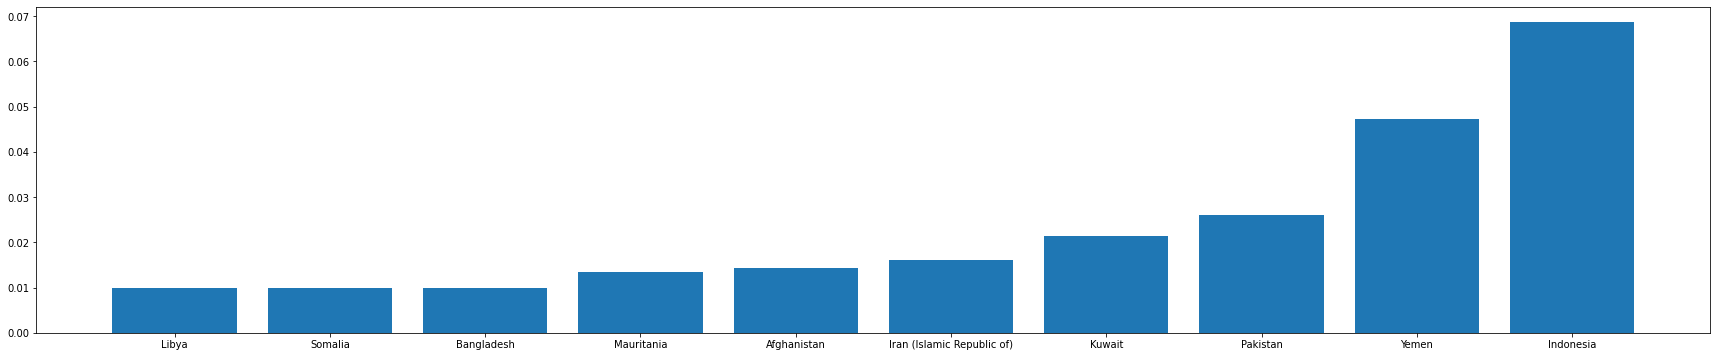

In [300]:
alcohol =life.groupby('Country')['Alcohol'].mean().reset_index()

# Sort the DataFrame by the mean alcohol value in descending order
alcohol = alcohol.sort_values(by='Alcohol', ascending=True)

alcohol = alcohol[:10]

# Select the top 10 countries with the highest alcohol consumption
top_10_alcohol = alcohol.head(10)

plt.figure(figsize=(30, 6))
plt.bar(alcohol["Country"], alcohol["Alcohol"])


In [301]:
# Correlation between alcohol and life expectancy
correlation = life['Alcohol'].corr(life['Life expectancy'])

print(f"Correlation between alcohol and life expectancy is: {correlation}. This is a moderate correlation")


Correlation between alcohol and life expectancy is: 0.40155261474642323. This is a moderate correlation


In [302]:
# Comparing developing countries in the year 2015 to developed countires
year2015 = life[life['Year'] == 2015]
developing = year2015[year2015['Status'] == 'Developing']
developing.head()

,Country,Year,Status,Population,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling,Life expectancy
0,Afghanistan,2015,Developing,33736494.0,65.0,1154,6.0,65.0,0.1,62,83,8.16,584.259210,19.1,17.2,0.01,10.1,65.0
16,Albania,2015,Developing,28873.0,99.0,0,99.0,99.0,0.1,0,0,6.00,3954.227830,58.0,1.2,4.60,14.2,77.8
32,Algeria,2015,Developing,39871528.0,95.0,63,95.0,95.0,0.1,21,24,NaN,4132.762920,59.5,6.0,NaN,14.4,75.6
48,Angola,2015,Developing,2785935.0,64.0,118,7.0,64.0,1.9,66,98,NaN,3695.793748,23.3,8.3,NaN,11.4,52.4
64,Antigua and Barbuda,2015,Developing,NaN,99.0,0,86.0,99.0,0.2,0,0,NaN,13566.954100,47.7,3.3,NaN,13.9,76.4


In [303]:
developed = year2015[year2015['Status'] == 'Developed']
developed.head()

,Country,Year,Status,Population,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling,Life expectancy
112,Australia,2015,Developed,23789338.0,93.0,74,93.0,93.0,0.1,1,1,NaN,56554.38760,66.6,0.6,NaN,20.4,82.8
128,Austria,2015,Developed,8633169.0,93.0,309,93.0,93.0,0.1,0,0,NaN,43665.94700,57.6,1.9,NaN,15.9,81.5
240,Belgium,2015,Developed,11274196.0,98.0,47,99.0,99.0,0.1,0,1,NaN,4356.87500,63.7,1.0,NaN,16.6,81.1
384,Bulgaria,2015,Developed,7177991.0,92.0,0,91.0,91.0,0.1,0,1,NaN,6993.47736,65.7,1.9,NaN,15.0,74.5
608,Croatia,2015,Developed,42364.0,94.0,206,94.0,94.0,0.1,0,0,NaN,11579.66740,63.7,1.5,NaN,15.3,78.0


In [304]:
sample = developing.sample(n = 50, replace = True)
sample1 = developed.sample(n = 50, replace = True)


In [305]:
sampleMerged = pd.concat([sample,sample1], axis = 0)
sampleMerged.head()

,Country,Year,Status,Population,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling,Life expectancy
2480,Thailand,2015,Developing,686576.0,99.0,154,99.0,99.0,0.1,8,9,NaN,5814.863134,33.6,7.7,NaN,13.6,74.9
16,Albania,2015,Developing,28873.0,99.0,0,99.0,99.0,0.1,0,0,6.0,3954.227830,58.0,1.2,4.6,14.2,77.8
1424,Liberia,2015,Developing,4499621.0,52.0,1060,52.0,52.0,0.9,8,11,NaN,452.387170,27.3,6.5,NaN,9.9,61.4
1616,Mexico,2015,Developing,12589949.0,82.0,0,87.0,87.0,0.1,30,35,NaN,9143.128494,63.5,1.5,NaN,13.3,76.7
928,Georgia,2015,Developing,37171.0,94.0,431,91.0,94.0,0.1,1,1,NaN,3764.649120,56.2,2.7,NaN,13.9,74.4


In [306]:
# Rounding decimals to the nearest int
sampleMerged1 = sampleMerged.copy()
decimals = 0
sampleMerged1['Life expectancy'] = sampleMerged1['Life expectancy'].apply(lambda x: round(x, decimals))
sampleMerged1['Life expectancy'] = sampleMerged1['Life expectancy'].apply(lambda x: int(x))
sampleMerged1.head()

,Country,Year,Status,Population,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling,Life expectancy
2480,Thailand,2015,Developing,686576.0,99.0,154,99.0,99.0,0.1,8,9,NaN,5814.863134,33.6,7.7,NaN,13.6,75
16,Albania,2015,Developing,28873.0,99.0,0,99.0,99.0,0.1,0,0,6.0,3954.227830,58.0,1.2,4.6,14.2,78
1424,Liberia,2015,Developing,4499621.0,52.0,1060,52.0,52.0,0.9,8,11,NaN,452.387170,27.3,6.5,NaN,9.9,61
1616,Mexico,2015,Developing,12589949.0,82.0,0,87.0,87.0,0.1,30,35,NaN,9143.128494,63.5,1.5,NaN,13.3,77
928,Georgia,2015,Developing,37171.0,94.0,431,91.0,94.0,0.1,1,1,NaN,3764.649120,56.2,2.7,NaN,13.9,74


Text(0.5, 1.0, 'Development Status vs Life Expectancy')

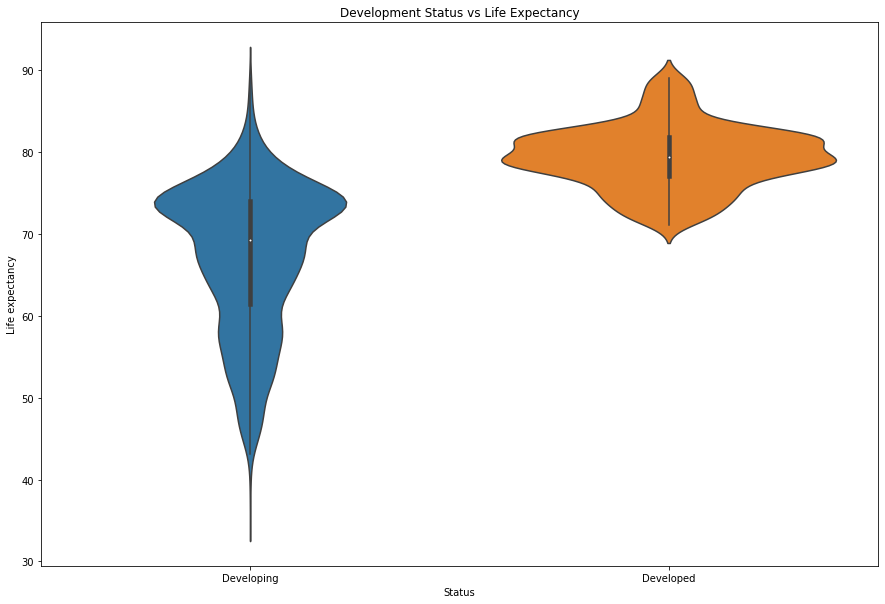

In [307]:
plt.figure(figsize = (15,10))
sns.violinplot(data = life, 
               x = 'Status', 
               y = 'Life expectancy'
               )
plt.title('Development Status vs Life Expectancy')


Text(0.5, 1.0, 'BMI vs Life Expectancy')

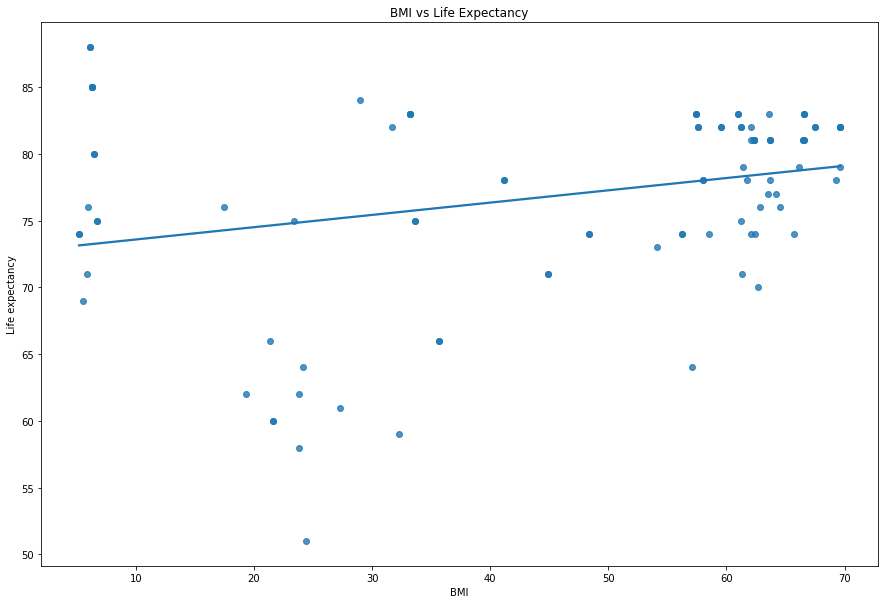

In [308]:
# Checking correlation between Life expectancy and BMI.
plt.figure(figsize = (15,10))
sns.regplot(data = sampleMerged1, x = 'BMI', y = 'Life expectancy', ci = True)
plt.title('BMI vs Life Expectancy')

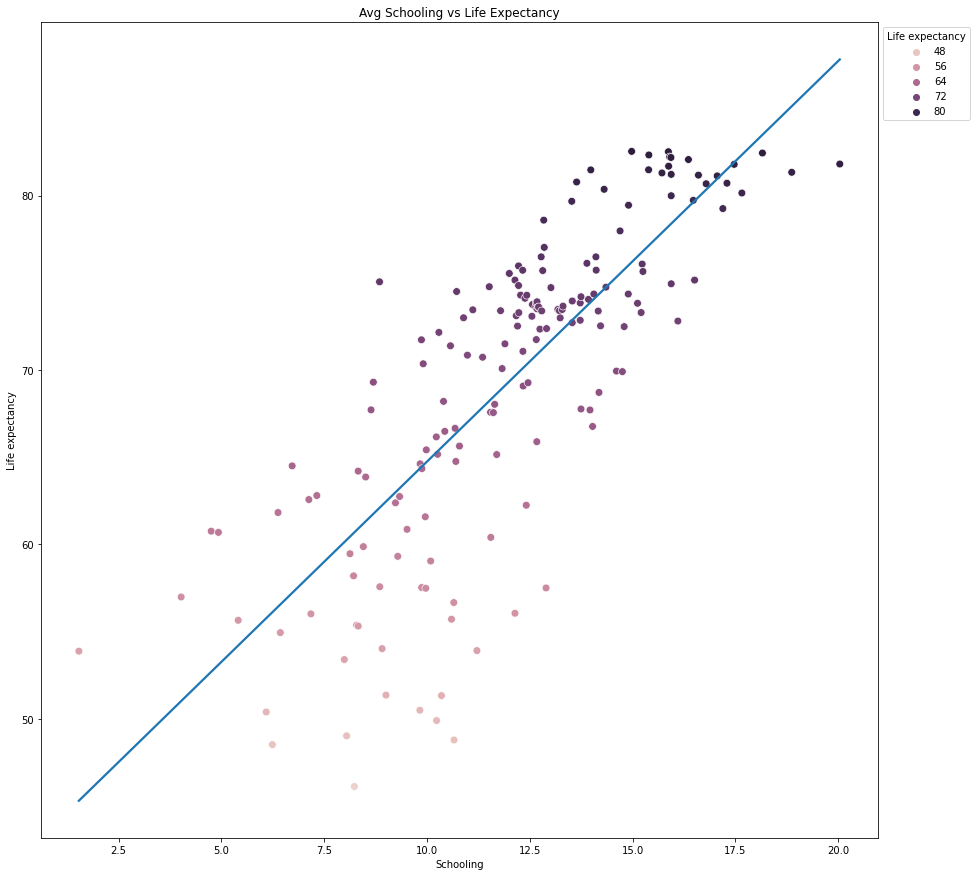

In [309]:
# Average schooling vs average life expectancy 
avgLife = life.groupby('Country')[['Schooling', 'Life expectancy']].mean().sort_values('Schooling')

plt.figure(figsize = (15,15))
ax = sns.scatterplot(data = avgLife, 
                x = 'Schooling', 
                y  = 'Life expectancy', 
                hue = 'Life expectancy',
                s = 60)
sns.move_legend(ax, 'upper left',bbox_to_anchor=(1, 1))
plt.title('Avg Schooling vs Life Expectancy')
plt.xlabel('Avg Schooling')
plt.ylabel('Avg Life Expectancy')



sns.regplot(data = avgLife, 
            x = "Schooling", 
            y = "Life expectancy", 
            scatter = False,
            ci = False 
            )




plt.show()

Text(0.5, 1.0, 'Developing vs Developed Countries Life Expectancy')

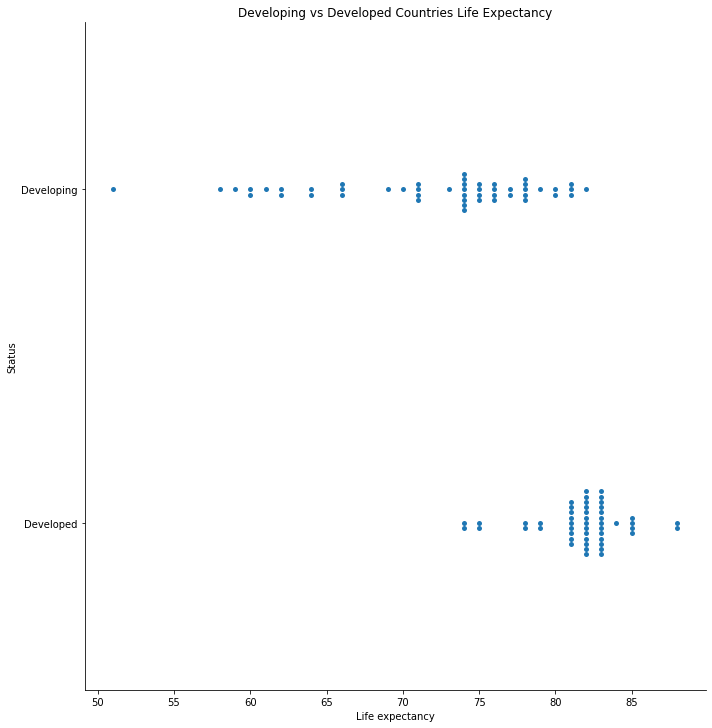

In [310]:
# Checking if Developing or Developed countries have higher life expectancies
sns.catplot(data = sampleMerged1, 
            x = 'Life expectancy', 
            y = 'Status', 
            kind = 'swarm',
            height = 10)
plt.title('Developing vs Developed Countries Life Expectancy')

Text(0.5, 1.0, 'Development Status vs GDP')

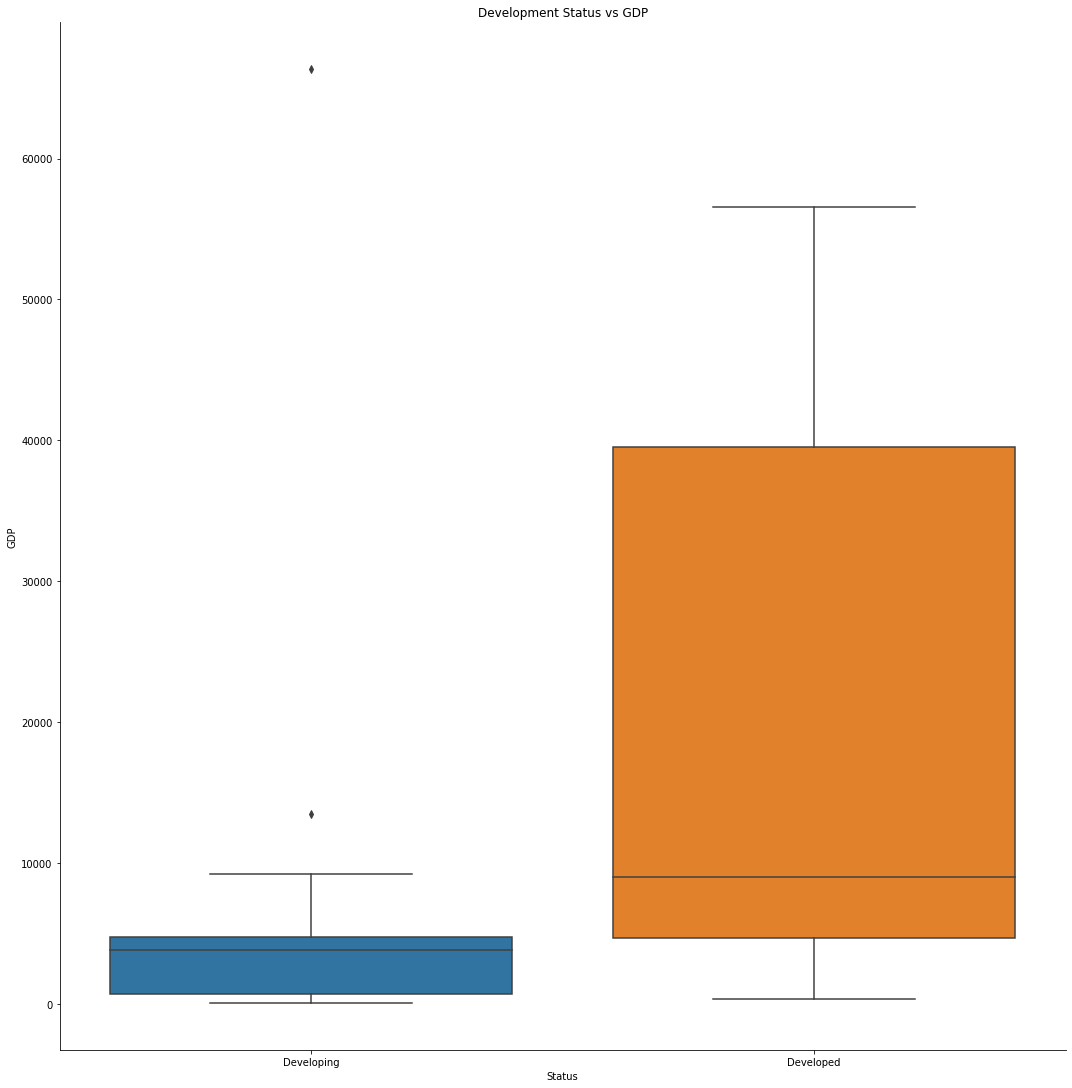

In [311]:
# Plotting boxplot of development status and average GDP from random sample of 50.
sns.catplot(data = sampleMerged1, 
            x = 'Status', 
            y = 'GDP', 
            kind = 'box',
            height = 15)
plt.title('Development Status vs GDP')

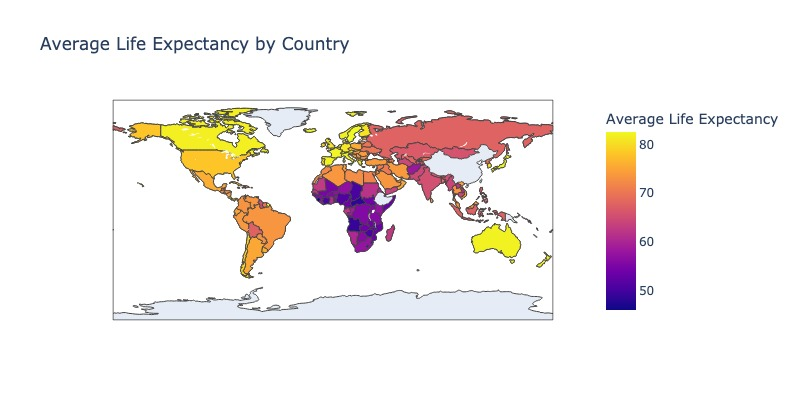

In [312]:
# Visualizing the countries that have the highest average life expectancy
life_avg = life.groupby('Country')['Life expectancy'].mean().sort_values(ascending=False).reset_index()

fig = px.choropleth(life_avg, locations="Country",
                    locationmode='country names',
                    color="Life expectancy",
                    title="Average Life Expectancy by Country",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    labels={'Life expectancy':'Average Life Expectancy'},
                    width=800, height=400)
fig.show(renderer = 'jpeg')

# Preprocessing Data

In [313]:
mean_population=life['Population'].mean()
mean_Hepatitis_b=life['Hepatitis B'].mean()
mean_polio=life['Polio'].mean()
mean_diphtheria=life['Diphtheria'].mean()
mean_total_expenditure=life['Total expenditure'].mean()
mean_GDP=life['GDP'].mean()
mean_BMI=life['BMI'].mean()
mean_thin=life['thinness  1-19 years'].mean()
mean_alocohol=life['Alcohol'].mean()
mean_schooling=life['Schooling'].mean()
mean_life_expectancy=life['Life expectancy'].mean()

In [314]:
life['Population'].fillna(mean_population,inplace=True)
life['Hepatitis B'].fillna(mean_Hepatitis_b,inplace=True)
life['Polio'].fillna(mean_polio,inplace=True)
life['Diphtheria'].fillna(mean_diphtheria,inplace=True)
life['Total expenditure'].fillna(mean_total_expenditure,inplace=True)
life['GDP'].fillna(mean_GDP,inplace=True)
life['BMI'].fillna(mean_BMI,inplace=True)
life['thinness  1-19 years'].fillna(mean_thin,inplace=True)
life['Alcohol'].fillna(mean_alocohol,inplace=True)
life['Schooling'].fillna(mean_schooling,inplace=True)
life['Life expectancy'].fillna(mean_life_expectancy,inplace=True)

In [315]:
life.head()

,Country,Year,Status,Population,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling,Life expectancy
0,Afghanistan,2015,Developing,33736494.0,65.0,1154,6.0,65.0,0.1,62,83,8.16,584.259210,19.1,17.2,0.01,10.1,65.0
1,Afghanistan,2014,Developing,327582.0,62.0,492,58.0,62.0,0.1,64,86,8.18,612.696514,18.6,17.5,0.01,10.0,59.9
2,Afghanistan,2013,Developing,31731688.0,64.0,430,62.0,64.0,0.1,66,89,8.13,631.744976,18.1,17.7,0.01,9.9,59.9
3,Afghanistan,2012,Developing,3696958.0,67.0,2787,67.0,67.0,0.1,69,93,8.52,669.959000,17.6,17.9,0.01,9.8,59.5
4,Afghanistan,2011,Developing,2978599.0,68.0,3013,68.0,68.0,0.1,71,97,7.87,63.537231,17.2,18.2,0.01,9.5,59.2


In [316]:
life = life.replace({'Developing': 0, 'Developed': 1})
lifeCopied = life.copy()
lifeCopied.head()

,Country,Year,Status,Population,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling,Life expectancy
0,Afghanistan,2015,0,33736494.0,65.0,1154,6.0,65.0,0.1,62,83,8.16,584.259210,19.1,17.2,0.01,10.1,65.0
1,Afghanistan,2014,0,327582.0,62.0,492,58.0,62.0,0.1,64,86,8.18,612.696514,18.6,17.5,0.01,10.0,59.9
2,Afghanistan,2013,0,31731688.0,64.0,430,62.0,64.0,0.1,66,89,8.13,631.744976,18.1,17.7,0.01,9.9,59.9
3,Afghanistan,2012,0,3696958.0,67.0,2787,67.0,67.0,0.1,69,93,8.52,669.959000,17.6,17.9,0.01,9.8,59.5
4,Afghanistan,2011,0,2978599.0,68.0,3013,68.0,68.0,0.1,71,97,7.87,63.537231,17.2,18.2,0.01,9.5,59.2


# Machine Learning 

In [317]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

X = life.drop(columns=['Country','Year','Life expectancy'],axis=1)
y = life['Life expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)


In [318]:
# Fitting the model then predicting the y
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
MSE = mean_squared_error(y_pred,y_test)
lr_score = lr.score(X_test,y_test)
print(f"Linear Regression MSE: {MSE:.2f} , R-squared:{lr_score:.2f}")

Linear Regression MSE: 20.43 , R-squared:0.79


In [319]:
# Finding the intercept
print(f'The intercept is: {lr.intercept_}')

The intercept is: 49.741206308765015


In [320]:
coef = lr.coef_
print(f"Linear Regression Coefs are: {coef}")

Linear Regression Coefs are: [ 2.59577443e+00 -3.10364338e-10 -1.70098529e-02 -1.60137173e-05
  4.14185542e-02  4.61689680e-02 -6.57587407e-01  1.17435390e-01
 -8.66397831e-02  2.72716766e-02  6.19702078e-05  6.05188635e-02
 -1.30229627e-01  3.71951295e-02  9.99794234e-01]


In [321]:
print(f'Train Accuracy: {lr.score(X_train,y_train):.3f}')
print(f'Test Accuracy: {lr.score(X_test,y_test):.3f} ')

Train Accuracy: 0.771
Test Accuracy: 0.788 


In [322]:
from sklearn.ensemble import RandomForestRegressor

rf_Model = RandomForestRegressor()
rf_Model.fit(X_train, y_train)
rf_Model.score(X_test, y_test)

0.9561586082683514

In [323]:
# Testing the accuracy for the test and training set
print(f'Train Accuracy: {rf_Model.score(X_train,y_train):.3f}')
print(f'Test Accuracy: {rf_Model.score(X_test,y_test):.3f} ')

Train Accuracy: 0.993
Test Accuracy: 0.956 


In [324]:
# Label encoding the categorical values
from sklearn.preprocessing import LabelEncoder 

categorize=['Country']

L_encoder=LabelEncoder()

for label in categorize:
    lifeCopied[label]=L_encoder.fit_transform(lifeCopied[label])

Text(0.5, 1.0, 'Data Correlations')

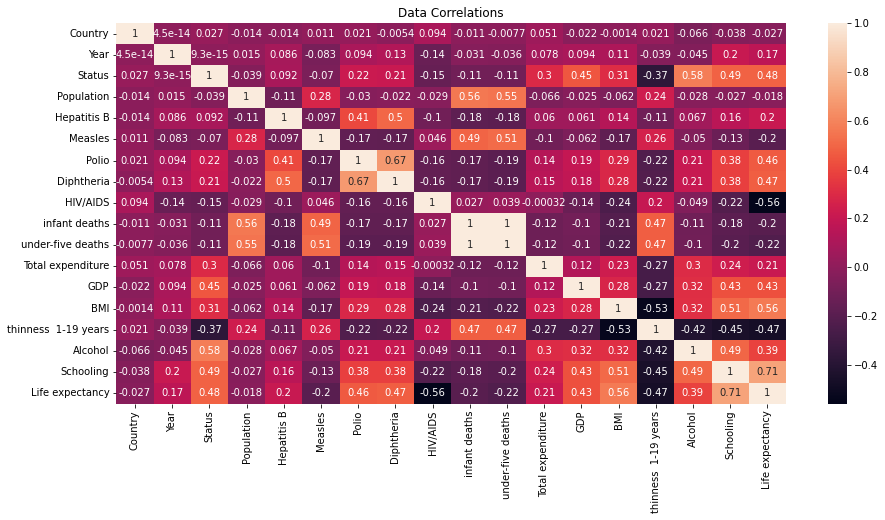

In [325]:
# Creating a heatmap to visualize correlations
plt.figure(figsize=(15,7))
sns.heatmap(lifeCopied.corr(),annot=True)
plt.title('Data Correlations')